In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/salary-data-1/Salary_Data_1.csv


# Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [3]:
df = pd.read_csv("/kaggle/input/salary-data-1/Salary_Data_1.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# EDA

In [4]:
# Check number of rows and columns
df.shape

(30, 2)

In [5]:
# Check the size of the dataset
df.size

60

In [6]:
# Check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
# Check any missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
# Statistical info
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
# Correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization

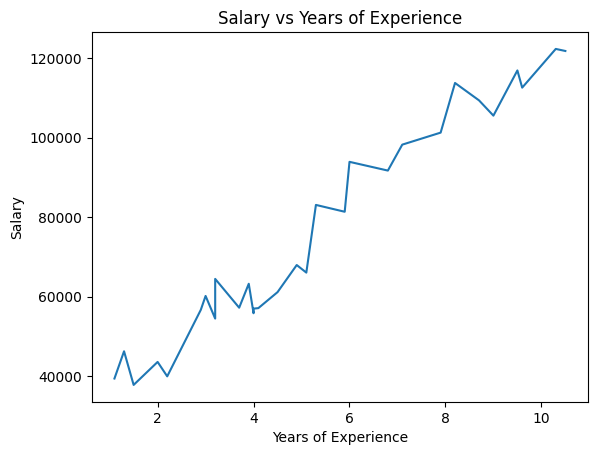

In [10]:
# Line plot
plt.plot(df["YearsExperience"], df["Salary"])
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

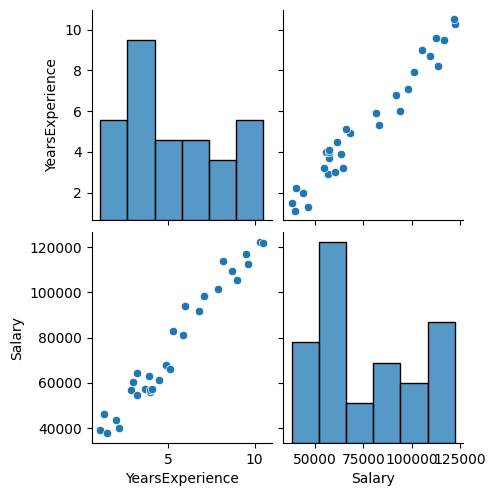

In [11]:
# Pair plot
sns.pairplot(df)
plt.show()

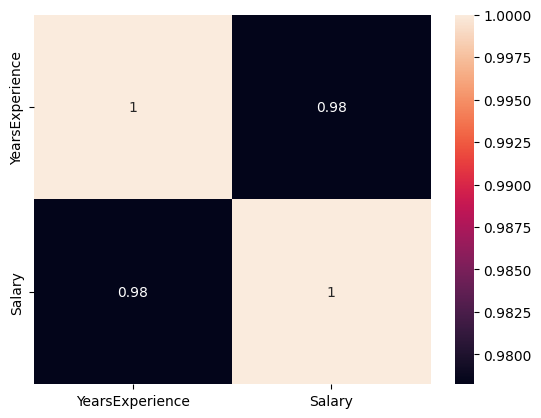

In [12]:
# Heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

# Independent and Dependent variable

In [13]:
# Independet or feature variable
X = df.iloc[:, :-1].values
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [14]:
# Dependent or target variable
y = df.iloc[:, -1].values
y[:5]

array([39343, 46205, 37731, 43525, 39891])

# Train and test set split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Simple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Prediction

In [17]:
y_pred = lr.predict(X_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

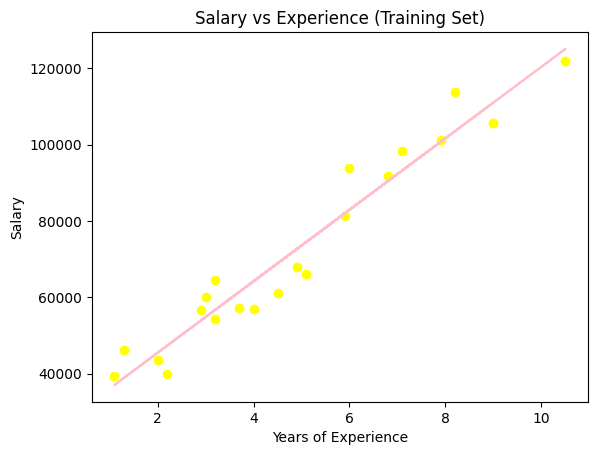

In [18]:
# Visualization of train set results
plt.scatter(X_train, y_train, color='yellow')
plt.plot(X_train, lr.predict(X_train), color='pink')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

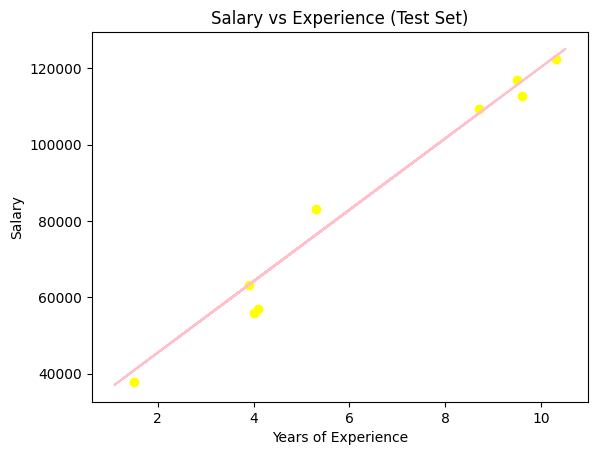

In [19]:
# Visualization of test set results
plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_train, lr.predict(X_train), color='pink')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Model Performance

In [20]:
from sklearn import metrics

In [21]:
print(f"R-Squared: {metrics.r2_score(y_test, y_pred)}")


R-Squared: 0.9740993407213511


In [22]:
print(f"Model Score: {lr.score(X_train, y_train)}")

Model Score: 0.9423777652193379


In [23]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error: 3737.417861878896


In [24]:
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 23370078.800832972


In [25]:
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Root Mean Squared Error: 4834.260936361728


# Making single prediction

In [26]:
lr.predict([[13]])

array([148460.78806172])

# Coefficient and Intercept

In [27]:
# Coefficient of fitted linear regression model
lr.coef_

array([9360.26128619])

In [28]:
# Intercept of fitted linear regression model
lr.intercept_

26777.391341197625